## Prediction of Number of Visitors in a Restaurant 

I decided to build a model using time series to predict the number of visitors to a restaurant per day. The data contains two features and 3,651 entries.

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
from fbprophet import Prophet


In [2]:
# import df
df = pd.read_csv('test_restaurant.csv')

In [3]:
df.head(10)

,date,num_visitors
0,2000-01-01,49.128490
1,2000-01-02,50.288060
2,2000-01-03,53.549213
3,2000-01-04,45.453240
4,2000-01-05,49.469402
5,2000-01-06,48.554940
6,2000-01-07,47.056410
7,2000-01-08,44.184040
8,2000-01-09,45.621517
9,2000-01-10,53.566944


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3651 entries, 0 to 3650
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          3651 non-null   object 
 1   num_visitors  3651 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [5]:
# checking for stats
df['num_visitors'].describe()
# the average number of visitors per dat is 24. The max number of visitors in one day is 70.

count    3651.000000
mean       24.782759
std        11.188746
min        -7.867497
25%        17.042217
50%        22.950304
75%        29.260646
max        69.849130
Name: num_visitors, dtype: float64

In [6]:
# checking for null values
df.isnull().sum()

date            0
num_visitors    0
dtype: int64

In [7]:
# looking for duplicates
df.nunique()

date            3651
num_visitors    3651
dtype: int64

In [8]:
# setting the date as an index
df.index = pd.DatetimeIndex(df['date'])
# drop date feature
df.drop('date' , axis = 1 , inplace = True)

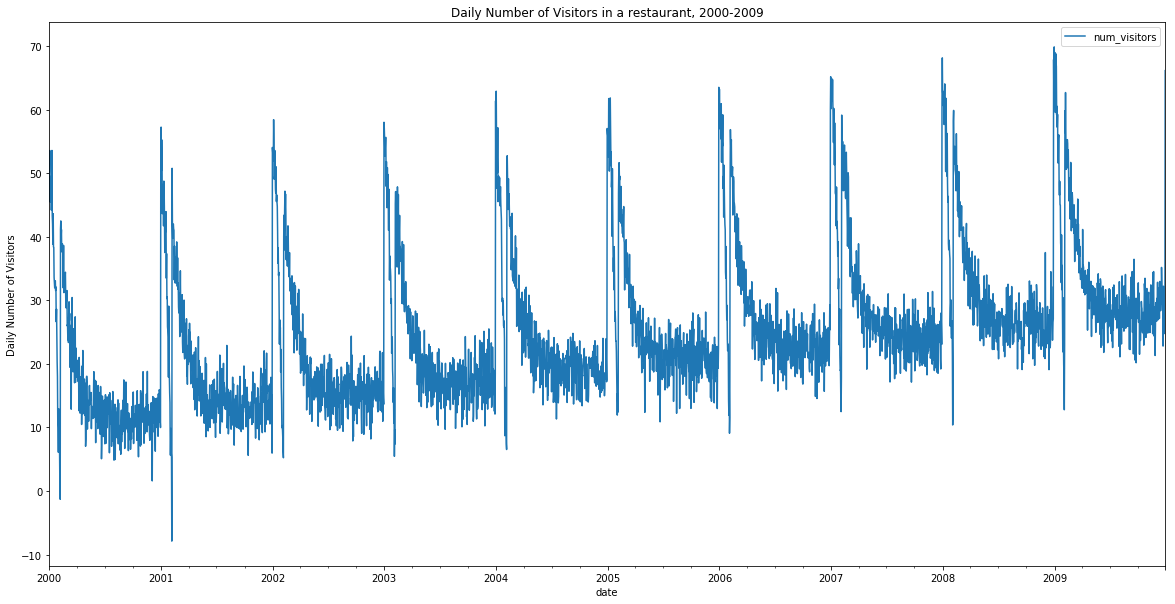

In [9]:
# plot
ax = df.plot(figsize=(20, 10))
plt.ylabel("Daily Number of Visitors")
plt.title("Daily Number of Visitors in a restaurant, 2000-2009")
plt.show()

In [53]:
def modeling (df):
    """It takes a df and implement ARIMA model and return a plot, predict and expetect values"""

    # Get only the values from the dataframe
    vals = df.values

    # split the data into train and test
    train = vals[261:]
    test = vals[:261]

    # Use a list comprehension to create a "history" list using the training data values
    history = [i for i in train]

    # initialize an empty list for predictions

    preds = []
    # loop through a list the length of our training set
    for i in range(len(test)):

            # create an ARIMA model and pass in the history list. Also set order=(0,1,1)

            # Fit the model I just created
            fitted_model = model.fit(disp=0)
            # Get the forecast of the next value from my fitted model, and grab the first value to use as the 'y-hat' prediction
            output = fitted_model.forecast()
            y_hat = output[0]

            # append y_hat to the list of predictions
            preds.append(y_hat)
            obs = test[i]

            # Get the actual ground truth value for this datetime and append it to the history array
            history.append(obs)


        # get the forecast for the next day
    future_preds = fitted_model.forecast()[0]

    print('Predicted: {} \t Expected: {}'.format(y_hat, obs))
     # Also calculate the MSE
    mse = mean_squared_error(test, preds)
    print("MSE for Test Set: {}".format(mse))
    plt.plot(test)
    plt.plot(preds, color='r')
    plt.ylabel('"Daily Number of Visitors"')
    plt.title('Predicted vs Expected  Number of Visitors Values')
    plt.legend(['Actual', 'Predicted'])
    plt.show()
    
    return future_preds




Predicted: [8.16102774] 	 Expected: [12.293093]
MSE for Test Set: 20.987903947113328


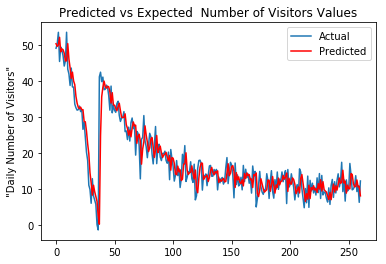

array([8.16102774])

In [54]:
modeling(df)

## Predicting forescating using Prophet


In [45]:
# resert the index to use Prophet library
df_prophet = df.reset_index()

In [52]:
# rename columns 
df_prophet = df_prophet.rename(columns = {'date': 'ds', 'num_visitors': 'y'})


In [56]:
# create a model and fit the model
my_model = Prophet(interval_width=0.95)
my_model.fit(df_prophet)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [46]:
# make a prediction for the until 2012
future_dates = my_model.make_future_dataframe(periods= 36, freq='MS')
future_dates.tail()

,ds
3682,2012-08-01
3683,2012-09-01
3684,2012-10-01
3685,2012-11-01
3686,2012-12-01


In [57]:
# create a table with predictive values
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3682,2012-08-01,32.511346,22.740520,42.479653
3683,2012-09-01,31.946497,21.546876,41.391746
3684,2012-10-01,32.252323,22.482386,43.104779
3685,2012-11-01,33.030592,23.265926,43.495591
3686,2012-12-01,34.927427,25.334472,45.094170


Text(58.0, 0.5, 'Daily Number of Visitors in a Restaurant')

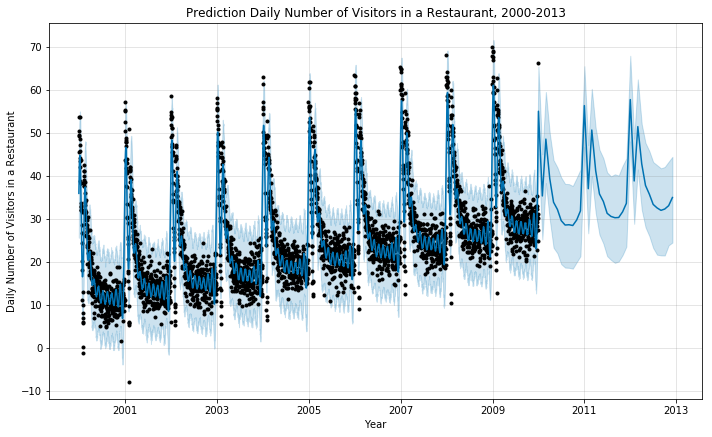

In [51]:
# plot the future values
model_1 = my_model.plot(forecast,uncertainty=True)
plt.title('Prediction Daily Number of Visitors in a Restaurant, 2000-2013')
plt.xlabel('Year')
plt.ylabel('Daily Number of Visitors in a Restaurant')